In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
    
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


# Loading the Test Test dataset 


In [100]:
df_test = pd.read_csv("/kaggle/input/ab-testing-dataset/test_group.csv", sep = ";", parse_dates=['Date'])
print(df_test.info())
print(df_test.shape)
df_test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB
None
(30, 10)


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


# Loading the  Control dataset

In [119]:
df_control = pd.read_csv("/kaggle/input/ab-testing-dataset/control_group.csv", sep = ";")
print(df_control.info())
print(df_control.shape)
df_control.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB
None
(30, 10)


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# let remove the "# of", to make our columns readable

In [120]:
df_control.columns = [c.replace("# of", "") for c in df_control.columns]
df_control.head(5)


,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## let print out the Test, 
## to ensure our columns are readable before moving on

In [121]:
df_test.columns = [c.replace("# of", "") for c in df_test.columns]

df_test.head(5)

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


### Let check for missing data for control

In [122]:
df_control.isnull().sum()

Campaign Name      0
Date               0
Spend [USD]        0
 Impressions       1
Reach              1
 Website Clicks    1
 Searches          1
 View Content      1
 Add to Cart       1
 Purchase          1
dtype: int64

### Let check for missing data for test

In [123]:
df_test.isnull().sum()

Campaign Name      0
Date               0
Spend [USD]        0
 Impressions       0
Reach              0
 Website Clicks    0
 Searches          0
 View Content      0
 Add to Cart       0
 Purchase          0
dtype: int64

### the dataset of the control has missing value in the row , Fill missing values with the mean of each column

In [106]:
df_control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', ' Impressions', 'Reach',
       ' Website Clicks', ' Searches', ' View Content', ' Add to Cart',
       ' Purchase'],
      dtype='object')

In [124]:
columns_with_missing_values = [' Impressions', 'Reach', ' Website Clicks', ' Searches', ' View Content', ' Add to Cart', ' Purchase']

for col in columns_with_missing_values:
    df_control[col] = df_control[col].fillna(df_control[col].mean())
    
df_control.isnull().sum()

Campaign Name      0
Date               0
Spend [USD]        0
 Impressions       0
Reach              0
 Website Clicks    0
 Searches          0
 View Content      0
 Add to Cart       0
 Purchase          0
dtype: int64

### let Merge our dataset into one dataset

In [111]:
df_data = df_control.merge(df_test,how="outer")
df_data.head(5)

/tmp/ipykernel_42/1366693416.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_data = df_control.merge(df_test,how="outer")


,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103


In [126]:
# let check the each campaign
print(df_data["Campaign Name"].value_counts())

Campaign Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64


In [128]:
df_data.describe()

,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2425.750000,92072.279310,71168.248851,5676.563218,2320.138506,1900.896552,1090.766667,522.013218
std,381.130461,32270.541283,30847.039691,1740.469866,663.473391,681.437956,427.427479,195.297540
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2073.750000,69558.250000,43235.500000,4230.750000,1970.750000,1249.000000,863.250000,340.000000
50%,2420.500000,98281.000000,77422.000000,5581.000000,2374.500000,1959.396552,1082.500000,506.000000
75%,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


In [137]:
# Create a 'Group' column based on the 'Campaign Name'
df_data['Group'] = ab_data['Campaign Name'].apply(lambda x: 'Control' if 'Control' in x else 'Test')
df_data.head(3)

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,Group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Control


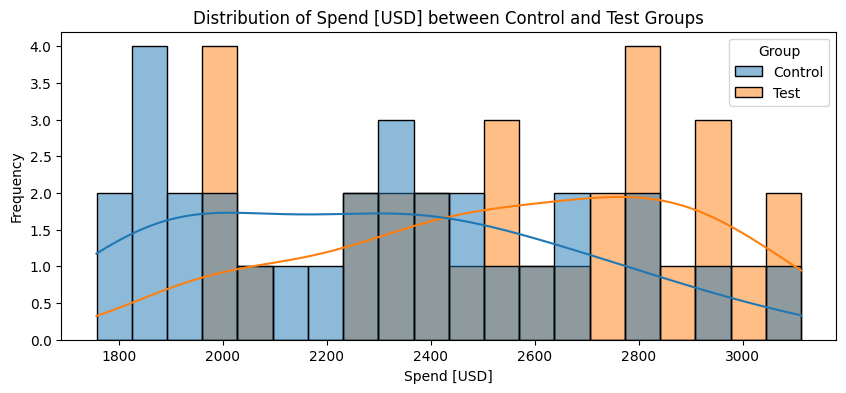

In [144]:
# Plotting Spend [USD] distribution
plt.figure(figsize=(10, 4))
sns.histplot(data=df_data, x='Spend [USD]', hue='Group', bins=20, kde=True)
plt.title('Distribution of Spend [USD] between Control and Test Groups')
plt.xlabel('Spend [USD]')
plt.ylabel('Frequency')
plt.show()

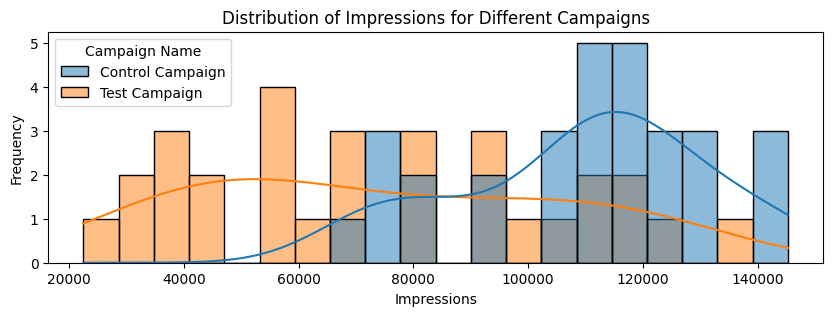

In [145]:
# Plotting Impressions distribution
plt.figure(figsize=(10, 3))
sns.histplot(data=df_data, x=' Impressions', hue='Campaign Name', bins=20, kde=True)
plt.title('Distribution of Impressions for Different Campaigns')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()

 This suggests that the Test Campaign potentially had a broader or more varied reach in terms of the number of impressions, which could be indicative of its performance compared to the Control Campaign

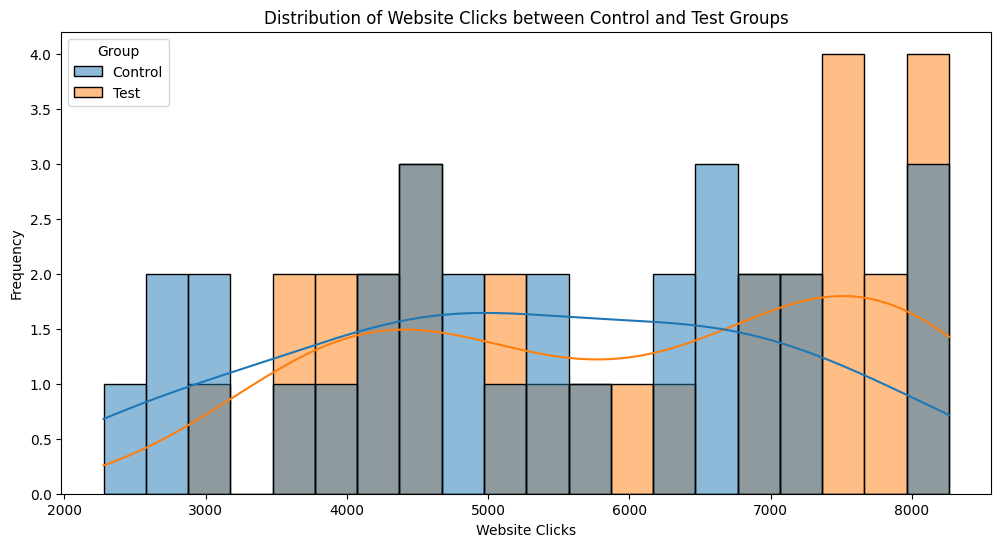

In [148]:
# Plotting Website Clicks distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df_data, x=' Website Clicks', hue='Group', bins=20, kde=True)
plt.title('Distribution of Website Clicks between Control and Test Groups')
plt.xlabel('Website Clicks')
plt.ylabel('Frequency')
plt.show()

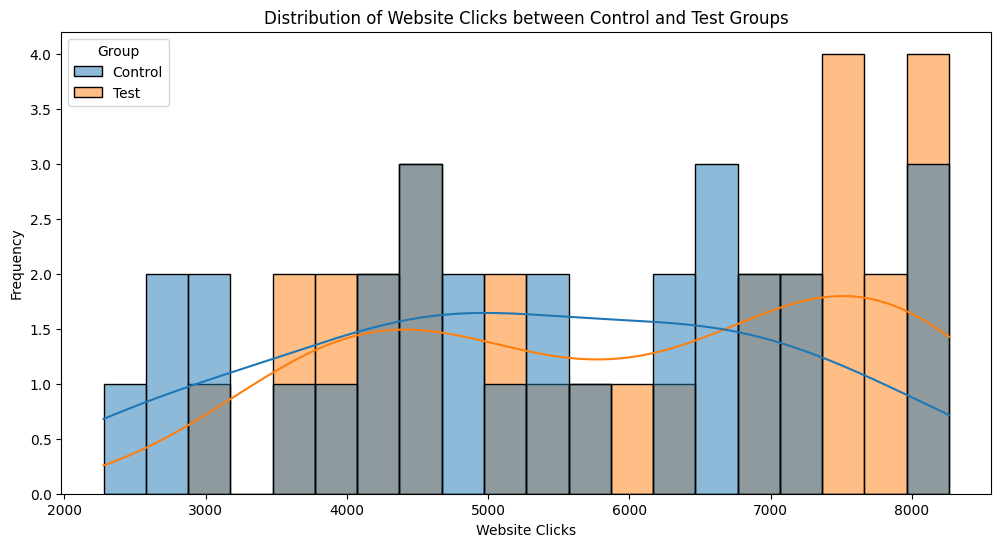

In [150]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_data, x=' Website Clicks', hue='Group', bins=20, kde=True)
plt.title('Distribution of Website Clicks between Control and Test Groups')
plt.xlabel('Website Clicks')
plt.ylabel('Frequency')
plt.show()

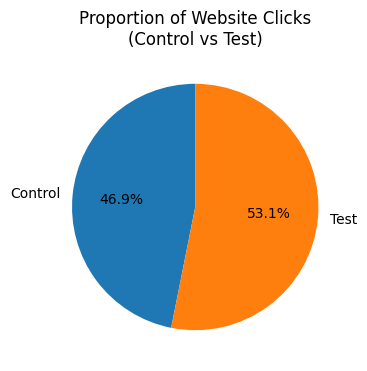

In [154]:
# Group by 'Group' and sum the counts for 'Website Clicks' and 'Searches'
grouped_data = df_data.groupby('Group')[[' Website Clicks', ' Searches']].sum()

# Plotting pie chart for 'Website Clicks'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pie(grouped_data[' Website Clicks'], labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Website Clicks\n(Control vs Test)');

### The test campaign as more website click than campaign

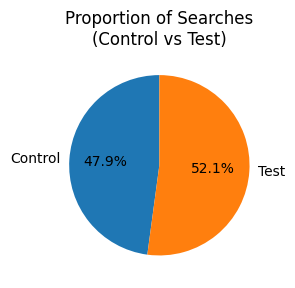

In [157]:
# Plotting pie chart for 'Searches'
plt.subplot(1, 2, 2)
plt.pie(grouped_data[' Searches'], labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Searches\n(Control vs Test)');

### The test campaign as more seaches than campaign

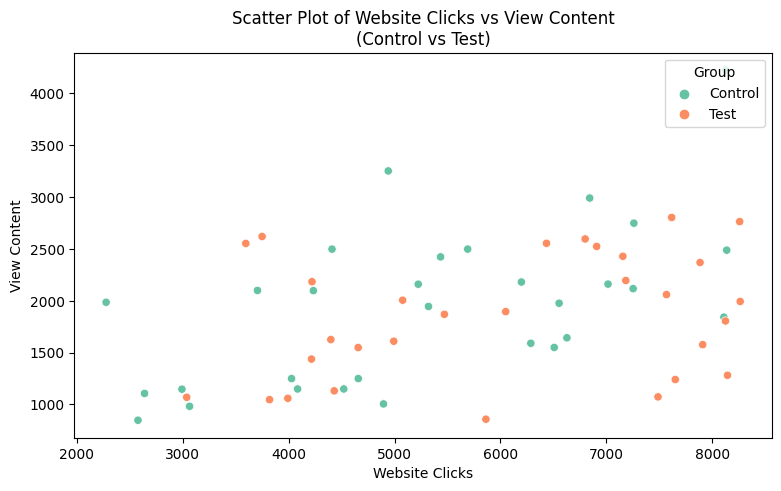

In [170]:
# Plotting scatter plot for 'Website Clicks' vs 'View Content'
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df_data, x=' Website Clicks', y=' View Content', hue='Group', palette='Set2')
plt.title('Scatter Plot of Website Clicks vs View Content\n(Control vs Test)')
plt.xlabel('Website Clicks')
plt.ylabel('View Content')
plt.legend(title='Group', loc='upper right')
plt.show()

Text(0.5, 1.0, 'Proportion of View Content\n(Control vs Test)')

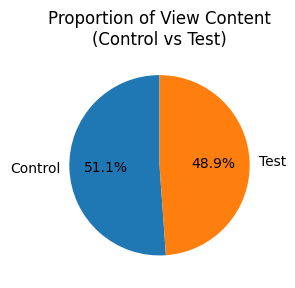

In [169]:

# Plotting pie chart for 'View Content'
plt.subplot(1, 2, 2)
plt.pie(grouped_data[' View Content'], labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of View Content\n(Control vs Test)')


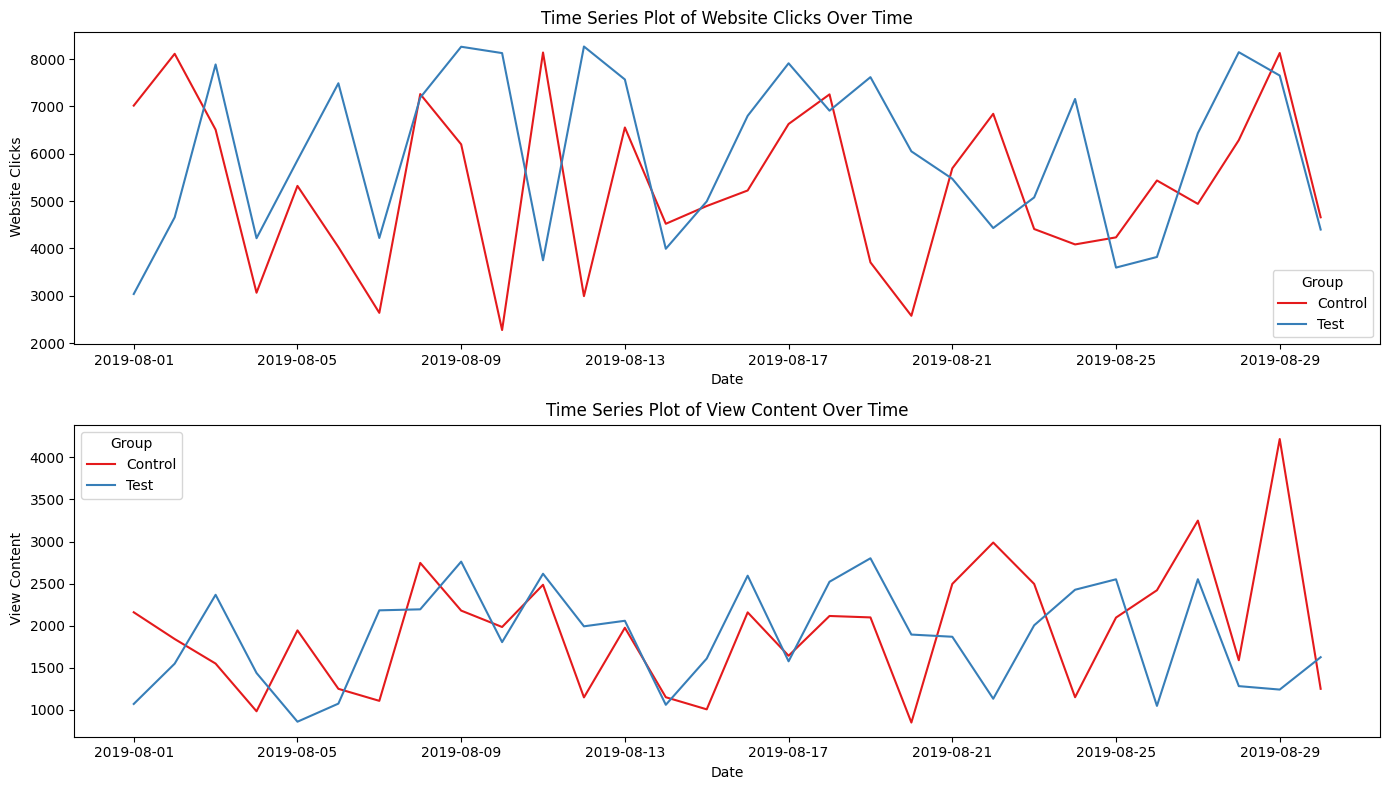

In [181]:
# Convert 'Date' column to datetime with the correct format
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%d.%m.%Y')

# Set the 'Date' column as the index
df_data.set_index('Date', inplace=True)

# Plotting time series for 'Website Clicks' and 'View Content'
plt.figure(figsize=(14, 8))

# Time series plot for 'Website Clicks'
plt.subplot(2, 1, 1)
sns.lineplot(data=df_data, x=df_data.index, y=' Website Clicks', hue='Group', palette='Set1')
plt.title('Time Series Plot of Website Clicks Over Time')
plt.ylabel(' Website Clicks')

# Time series plot for 'View Content'
plt.subplot(2, 1, 2)
sns.lineplot(data=df_data, x=df_data.index, y=' View Content', hue='Group', palette='Set1')
plt.title('Time Series Plot of View Content Over Time')
plt.ylabel(' View Content')

plt.tight_layout()
plt.show()